---
title: "Introducción a la Programación en Python"
subtitle: "Clase 8 — Procesamiento de Datos con Pandas"
author: "Dr. Stefan Vogt Geisse"
format:
  revealjs:
    theme: white
    slide-number: true
    transition: fade
    incremental: true
    code-line-numbers: true
    controls: true
    progress: true
    center: true
execute:
  echo: true
  warning: false
  message: false
  error: true
jupyter: python3
---



## Clase 8 — Pandas
<!-- 00:00–02:30 (2:30) -->

::: notes
Objetivo: “enganche” inmediato: hoy pasamos de archivos (Clase 7) a tablas (Pandas) y a gráficos sin tener que construir listas a mano.
Asegurar que la primera celda de setup se ejecute.
:::


## Objetivos
<!-- 02:30–05:30 (3:00) -->

Al final de esta clase podrás:

1. Crear `DataFrame` desde estructuras Python
2. Inspeccionar y seleccionar columnas/filas correctamente
3. Crear columnas nuevas con operaciones simples
4. Cargar un CSV pequeño y generar un gráfico básico con `.plot()`

::: notes
Mantener el foco: “leer, mirar, seleccionar, graficar”. Evitar estadística.
:::


## Setup
<!-- 05:30–07:00 (1:30) -->

Ejecuta la celda de abajo (una vez).

::: notes
Si Pandas no estuviera instalado en el entorno de los estudiantes, se puede instalar con pip en un notebook:
`%pip install pandas`
No poner esto en la slide; si hace falta, mostrarlo en vivo como demo.
:::


In [2]:
# Setup (ejecuta esta celda una vez)
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt

# Para que las figuras aparezcan en el notebook
%matplotlib inline

print("Pandas:", pd.__version__)
print("Directorio de trabajo:", Path.cwd())


Pandas: 2.3.3
Directorio de trabajo: /home/svogt/repos/curso_python_2026/dia_4


## Motivación: de archivos → tablas → gráficos
<!-- 07:00–11:00 (4:00) -->

- Mucha información real llega como **tabla** (CSV, Excel, bases de datos)
- Con listas/diccionarios “a mano”:
  - inspeccionar es lento
  - seleccionar columnas/filas es incómodo
  - graficar requiere preparar arreglos explícitos
- Pandas organiza los datos y permite **selección + gráficos** con menos código

::: notes
Conectar explícitamente con Clase 7: “ya sabemos leer/escribir texto y navegar directorios; ahora ponemos esos datos en una tabla”.
:::


## ¿Qué es Pandas?
<!-- 11:00–14:00 (3:00) -->

- Librería para trabajar con **datos tabulares**
- Datos con **etiquetas**:
  - columnas con nombre
  - índice (etiqueta de filas)
- Dos estructuras principales:
  - **`Series`**: 1 columna
  - **`DataFrame`**: tabla (múltiples columnas)

::: notes
“Etiquetas” es la palabra clave. No profundizar en Series hoy; solo la idea.
:::


## Crear un `DataFrame` (desde un diccionario)
<!-- 14:00–18:00 (4:00) -->

Un caso común: cada columna es una lista con la misma longitud.

- claves → nombres de columnas
- valores → datos de la columna




::: notes
Hacer notar que todas las columnas deben tener la misma longitud.
:::


In [3]:
import pandas as pd

data = {
    "ciudad": ["Concepción", "Santiago", "Valdivia", "La Serena"],
    "poblacion_millones": [0.23, 5.6, 0.17, 0.21],
    "region": ["Biobío", "RM", "Los Ríos", "Coquimbo"],
}

df = pd.DataFrame(data)
df


,ciudad,poblacion_millones,region
0,Concepción,0.23,Biobío
1,Santiago,5.60,RM
2,Valdivia,0.17,Los Ríos
3,La Serena,0.21,Coquimbo


## Crear un `DataFrame` (lista de diccionarios)
<!-- 18:00–21:00 (3:00) -->

Cada fila es un diccionario:

- útil cuando los datos vienen “registro por registro”
- claves se alinean como columnas

::: notes
Enfatizar que Pandas rellena con NaN si falta una clave en alguna fila; mencionar sin demo larga.
:::


In [4]:
rows = [
    {"id": 1, "grupo": "A", "score": 12},
    {"id": 2, "grupo": "A", "score": 15},
    {"id": 3, "grupo": "B", "score": 9},
    {"id": 4, "grupo": "B", "score": 18},
]

df2 = pd.DataFrame(rows)
df2


,id,grupo,score
0,1,A,12
1,2,A,15
2,3,B,9
3,4,B,18


## Inspeccionar un `DataFrame`
<!-- 21:00–26:00 (5:00) -->

Herramientas mínimas:

- `df.head()` / `df.tail()`
- `df.shape`  (filas, columnas)
- `df.columns`
- `df.info()`  (tipos y nulos)


::: notes
Mostrar `info()` y explicar “dtype” muy brevemente: int/float/object.
:::


In [5]:
df.head()


,ciudad,poblacion_millones,region
0,Concepción,0.23,Biobío
1,Santiago,5.60,RM
2,Valdivia,0.17,Los Ríos
3,La Serena,0.21,Coquimbo


In [6]:
df.shape, list(df.columns)


((4, 3), ['ciudad', 'poblacion_millones', 'region'])

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ciudad              4 non-null      object 
 1   poblacion_millones  4 non-null      float64
 2   region              4 non-null      object 
dtypes: float64(1), object(2)
memory usage: 228.0+ bytes


## Micro‑ejercicio 1 
<!-- 26:00–29:00 (3:00) -->

Con `df2`:

1. Muestra las **últimas 2 filas**
2. Imprime `shape`
3. Imprime la lista de columnas

::: notes
Dejar que lo hagan rápido. Solución en la siguiente celda (oculta por defecto al presentar, pero visible en notebook).
:::


In [8]:
# Solución (micro‑ejercicio 1)
df2.tail(2)


,id,grupo,score
2,3,B,9
3,4,B,18


In [9]:
df2.shape


(4, 3)

In [10]:
list(df2.columns)


['id', 'grupo', 'score']

## Seleccionar datos: columnas
<!-- 29:00–34:00 (5:00) -->

- Una columna → `df["columna"]` (devuelve `Series`)
- Varias columnas → `df[["c1", "c2"]]` (devuelve `DataFrame`)


::: notes
Repetir: corchetes simples para Series, doble lista para DataFrame.
:::


In [11]:
df["ciudad"]


0    Concepción
1      Santiago
2      Valdivia
3     La Serena
Name: ciudad, dtype: object

In [12]:
df[["ciudad", "poblacion_millones"]]


,ciudad,poblacion_millones
0,Concepción,0.23
1,Santiago,5.60
2,Valdivia,0.17
3,La Serena,0.21


## Seleccionar datos: filas por posición (mención)
<!-- 34:00–36:00 (2:00) -->

- `df.iloc[i]` → fila i (por **posición**)
- `df.iloc[i:j]` → rango de filas

*(Hoy lo usamos de forma mínima.)*

::: notes
No profundizar en loc/iloc. Solo iloc para que puedan “tomar filas” sin confusión.
:::


In [13]:
df.iloc[0]


ciudad                Concepción
poblacion_millones          0.23
region                    Biobío
Name: 0, dtype: object

In [14]:
df.iloc[1:3]


,ciudad,poblacion_millones,region
1,Santiago,5.60,RM
2,Valdivia,0.17,Los Ríos


## Selección booleana (filtrado)
<!-- 36:00–41:00 (5:00) -->

Un patrón esencial:

1. Construir una condición sobre una columna
2. Usarla para filtrar filas


::: notes
Conectar con if/else: “la condición ahora se evalúa para cada fila, sin bucle explícito”.
:::


In [15]:
df2[df2["score"] >= 12]


,id,grupo,score
0,1,A,12
1,2,A,15
3,4,B,18


In [16]:
df2[df2["grupo"] == "B"]


,id,grupo,score
2,3,B,9
3,4,B,18


## Operaciones simples: nuevas columnas
<!-- 41:00–46:00 (5:00) -->

Puedes crear columnas nuevas a partir de otras:

- operaciones aritméticas
- combinaciones de texto (mínimo)

::: notes
Enfatizar “sin bucle”. Mostrar que la operación se aplica fila a fila.
:::


In [17]:
df2["score_norm"] = df2["score"] / df2["score"].max()
df2


,id,grupo,score,score_norm
0,1,A,12,0.666667
1,2,A,15,0.833333
2,3,B,9,0.500000
3,4,B,18,1.000000


## Resumen rápido: `.describe()`
<!-- 46:00–48:00 (2:00) -->

Para columnas numéricas, `describe()` entrega un resumen básico.

*(No es estadística avanzada; es inspección rápida.)*

::: notes
Solo mostrar salida, no explicar cuartiles en detalle.
:::


In [18]:
df2.describe()


,id,score,score_norm
count,4.000000,4.000000,4.000000
mean,2.500000,13.500000,0.750000
std,1.290994,3.872983,0.215166
min,1.000000,9.000000,0.500000
25%,1.750000,11.250000,0.625000
50%,2.500000,13.500000,0.750000
75%,3.250000,15.750000,0.875000
max,4.000000,18.000000,1.000000


## De `pathlib` a Pandas: crear y leer un CSV
<!-- 48:00–54:00 (6:00) -->

Flujo típico:

1. Definir una carpeta de trabajo (`data/`)
2. Guardar una tabla como CSV
3. Leer el CSV con `pd.read_csv(...)`

::: notes
Esto “cierra el círculo” con Clase 7. Recalcar ruta relativa vs absoluta.
:::


In [19]:
from pathlib import Path

data_dir = Path("data")
data_dir.mkdir(exist_ok=True)

csv_path = data_dir / "mediciones.csv"
csv_path


PosixPath('data/mediciones.csv')

In [20]:
df_med = pd.DataFrame({
    "dia": [1, 2, 3, 4, 5, 6],
    "temperatura_C": [18.0, 18.5, 19.2, 20.1, 19.7, 18.9],
    "humedad_pct": [72, 70, 68, 65, 66, 71],
})

df_med.to_csv(csv_path, index=False)
print("Escrito:", csv_path, "| existe:", csv_path.exists())


Escrito: data/mediciones.csv | existe: True


In [21]:
df_loaded = pd.read_csv(csv_path)
df_loaded.head()


,dia,temperatura_C,humedad_pct
0,1,18.0,72
1,2,18.5,70
2,3,19.2,68
3,4,20.1,65
4,5,19.7,66


## Primeros gráficos con Pandas
<!-- 54:00–59:00 (5:00) -->

- `Series.plot(...)` y `DataFrame.plot(...)`
- Por debajo usa **matplotlib**
- Mantendremos solo:
  - línea
  - barras
  - etiquetas (título, ejes)


::: notes
Mensaje clave: “Pandas hace el 80% del trabajo; matplotlib sigue ahí”. Evitar configurar estilos.
:::


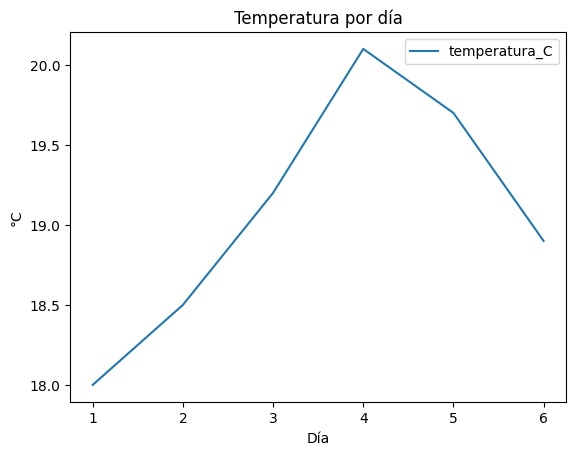

In [22]:
df_loaded.plot(x="dia", y="temperatura_C", title="Temperatura por día")
plt.xlabel("Día")
plt.ylabel("°C")
plt.show()


## Barras: comparar valores
<!-- 59:00–62:00 (3:00) -->

Ejemplo: humedad por día (barras).

::: notes
Mostrar que cambiamos kind="bar". Recordar plt.show().
:::


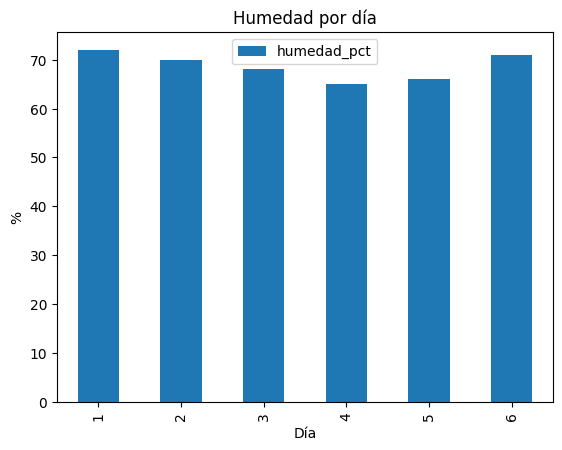

In [23]:
df_loaded.plot(x="dia", y="humedad_pct", kind="bar", title="Humedad por día")
plt.xlabel("Día")
plt.ylabel("%")
plt.show()


## Agregar valores (muy básico)
<!-- 62:00–67:00 (5:00) -->

Un caso común: resumir por grupos.

Ejemplo: promedio de `score` por `grupo`.

::: notes
Groupby como herramienta práctica, sin teoría. Solo mean().
:::


In [24]:
df2.groupby("grupo")["score"].mean()


grupo
A    13.5
B    13.5
Name: score, dtype: float64

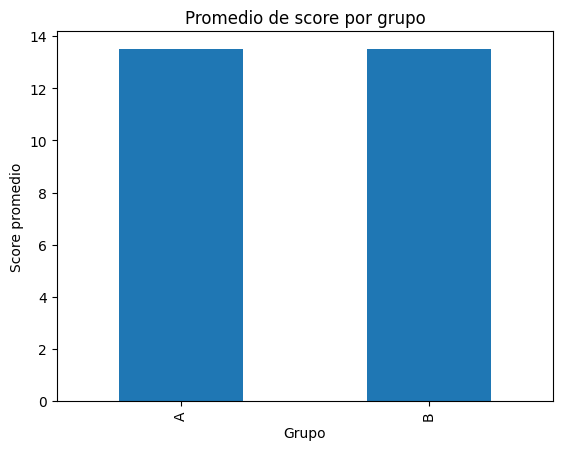

In [25]:
df2.groupby("grupo")["score"].mean().plot(kind="bar", title="Promedio de score por grupo")
plt.xlabel("Grupo")
plt.ylabel("Score promedio")
plt.show()


## Micro‑ejercicio 2 
<!-- 67:00–72:00 (5:00) -->

Con `df_loaded`:

1. Crea una columna nueva `temp_F` (Fahrenheit) a partir de `temperatura_C`
2. Grafica `temp_F` vs `dia` con título y etiquetas de ejes

::: notes
Dejar que intenten. Solución en la siguiente celda.
:::


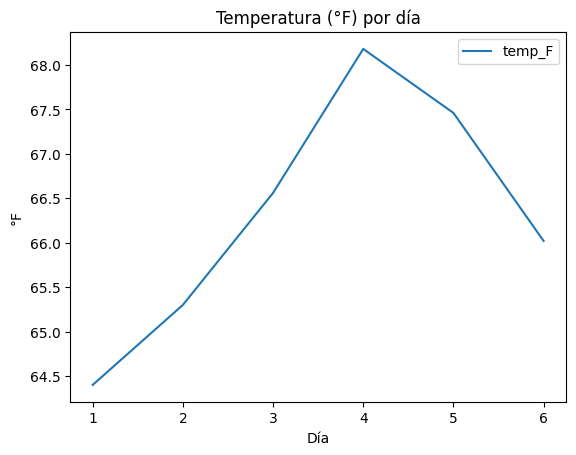

In [26]:
# Solución (micro‑ejercicio 2)
df_loaded["temp_F"] = df_loaded["temperatura_C"] * 9/5 + 32

df_loaded.plot(x="dia", y="temp_F", title="Temperatura (°F) por día")
plt.xlabel("Día")
plt.ylabel("°F")
plt.show()


## Final Boss
<!-- 72:00–79:00 (7:00) -->

Vas a trabajar con un dataset pequeño de “ventas” (CSV):

1. Cargar el CSV desde `data/`
2. Inspeccionar (`head`, `info`, `columns`)
3. Filtrar filas con una condición booleana
4. Crear una columna nueva
5. Hacer **al menos 1 gráfico** desde el `DataFrame`
6. Escribir en 2–3 líneas qué muestra el gráfico

::: notes
Crear el CSV en una celda anterior para asegurar reproducibilidad, pero que el ejercicio sea “cargar y trabajar”.
:::


In [27]:
# Creamos un CSV de ejemplo para el ejercicio (no editar)
sales_path = data_dir / "ventas.csv"

df_sales = pd.DataFrame({
    "dia": [1, 1, 2, 2, 3, 3, 4, 4],
    "producto": ["A", "B", "A", "B", "A", "B", "A", "B"],
    "unidades": [10, 6, 12, 7, 9, 10, 14, 8],
    "precio_unitario": [1200, 900, 1200, 900, 1200, 900, 1200, 900],
})

df_sales.to_csv(sales_path, index=False)
print("Listo:", sales_path)


Listo: data/ventas.csv


In [28]:
# TU TURNO: carga el CSV en un DataFrame llamado df
# Pista: pd.read_csv(sales_path)

df = pd.read_csv(sales_path)
df.head()


,dia,producto,unidades,precio_unitario
0,1,A,10,1200
1,1,B,6,900
2,2,A,12,1200
3,2,B,7,900
4,3,A,9,1200


In [29]:
# 1) Inspección mínima
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   dia              8 non-null      int64 
 1   producto         8 non-null      object
 2   unidades         8 non-null      int64 
 3   precio_unitario  8 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 388.0+ bytes


In [30]:
# 2) Filtrado: crea df_A con solo producto == "A"
df_A = df[df["producto"] == "A"]
df_A


,dia,producto,unidades,precio_unitario
0,1,A,10,1200
2,2,A,12,1200
4,3,A,9,1200
6,4,A,14,1200


In [31]:
# 3) Nueva columna: ingreso = unidades * precio_unitario
df["ingreso"] = df["unidades"] * df["precio_unitario"]
df.head()


,dia,producto,unidades,precio_unitario,ingreso
0,1,A,10,1200,12000
1,1,B,6,900,5400
2,2,A,12,1200,14400
3,2,B,7,900,6300
4,3,A,9,1200,10800


In [32]:
# 4) Agregación simple: ingreso total por producto (tabla)
ingreso_por_producto = df.groupby("producto")["ingreso"].sum()
ingreso_por_producto


producto
A    54000
B    27900
Name: ingreso, dtype: int64

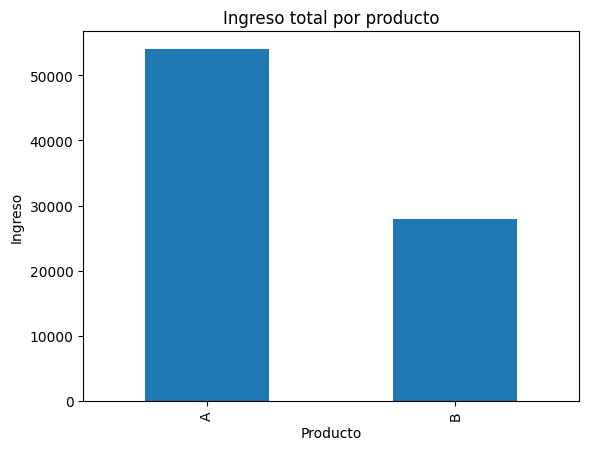

In [33]:
# 5) Gráfico: barras del ingreso total por producto
ingreso_por_producto.plot(kind="bar", title="Ingreso total por producto")
plt.xlabel("Producto")
plt.ylabel("Ingreso")
plt.show()


## Cierre
<!-- 79:00–80:00 (1:00) -->

Hoy ya puedes:

- Crear y leer tablas con Pandas (`DataFrame`)
- Inspeccionar y seleccionar datos sin bucles manuales
- Crear columnas nuevas de forma segura
- Generar gráficos básicos desde tus datos con `.plot()`

Próximo paso: combinar esto con **archivos + limpieza + transformaciones** en clases de procesamiento de datos.

::: notes
Cerrar en 1 minuto. Hacer explícito “qué pueden hacer desde mañana”.
:::
